In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
Retail=pd.read_csv('Retail_Transaction_Dataset.csv')

In [5]:
Retail

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...,...,...
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717


In [6]:
Retail['TotalAmount']=Retail['TotalAmount'].round()

In [7]:
Retail.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

In [8]:
Retail['TransactionDate']=pd.to_datetime (Retail['TransactionDate'])

In [9]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [10]:
Retail['Day_Name']=Retail['TransactionDate'].dt.day_name()


In [11]:
Dailysales=Retail.groupby('Day_Name')['TotalAmount'].sum()

In [12]:
Daily=Dailysales.index
Total=Dailysales.values

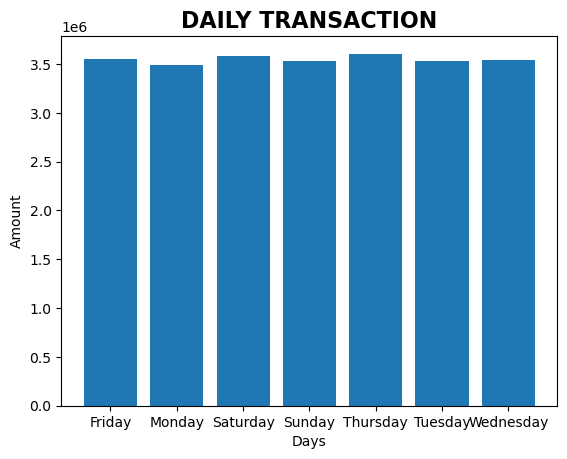

In [13]:
plt.bar(Daily,Total)
plt.title('DAILY TRANSACTION',fontsize=16,fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Amount')
plt.show()

In [14]:
Retail['Month_Name']=Retail['TransactionDate'].dt.month_name()


In [15]:
monthlysales=Retail.groupby('Month_Name')['TotalAmount'].sum()

In [16]:
monthly=monthlysales.index
mtotal=monthlysales.values

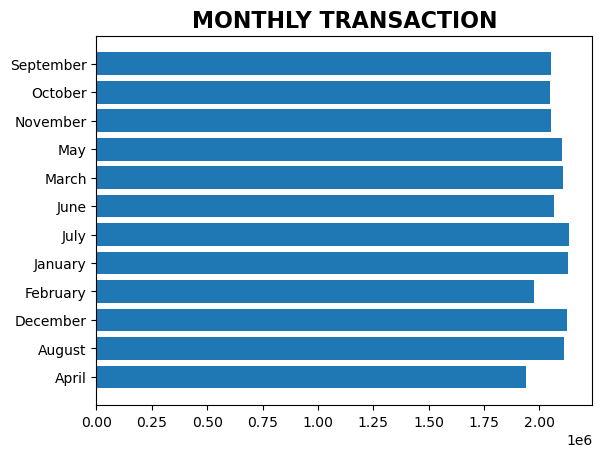

In [17]:
plt.barh(monthly,mtotal)
plt.title('MONTHLY TRANSACTION',fontsize=16,fontweight='bold')
plt.show()

In [18]:
Retail['Quater']=Retail['TransactionDate'].dt.quarter

In [19]:
Quatersales=Retail.groupby('Quater')['TotalAmount'].sum()

In [20]:
quat=Quatersales.index
qtotal=Quatersales.values

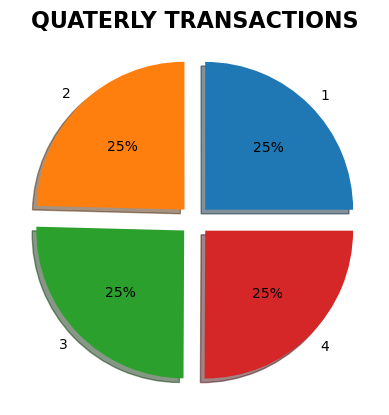

In [21]:
plt.pie(qtotal,labels=quat,autopct='%1.0f%%',shadow=True,explode=[0.1,0.1,0.1,0.1])
plt.title('QUATERLY TRANSACTIONS',fontsize=16,fontweight='bold')
plt.show()

In [22]:
Retail['Year']=Retail['TransactionDate'].dt.year

In [23]:
Yearlysales=Retail.groupby('Year')['TotalAmount'].sum()

In [24]:
Yearlysales

Year
2023    16745441.0
2024     8088103.0
Name: TotalAmount, dtype: float64

In [25]:
yr=Yearlysales.index
Ytotal=Yearlysales.values

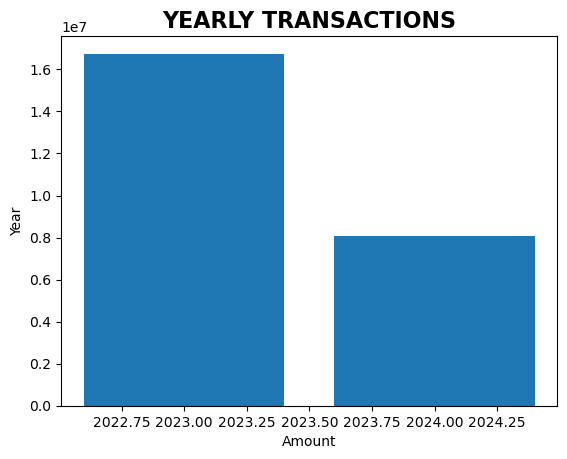

In [26]:
plt.bar(yr,Ytotal)
plt.title('YEARLY TRANSACTIONS',fontsize=16,fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Year')
plt.show()

In [27]:
totrevbyproducts=Retail.groupby('ProductID')['TotalAmount'].sum()

In [28]:
totrevbyproducts

ProductID
A    6138733.0
B    6208156.0
C    6243632.0
D    6243023.0
Name: TotalAmount, dtype: float64

In [29]:
products=totrevbyproducts.index
TA=totrevbyproducts.values

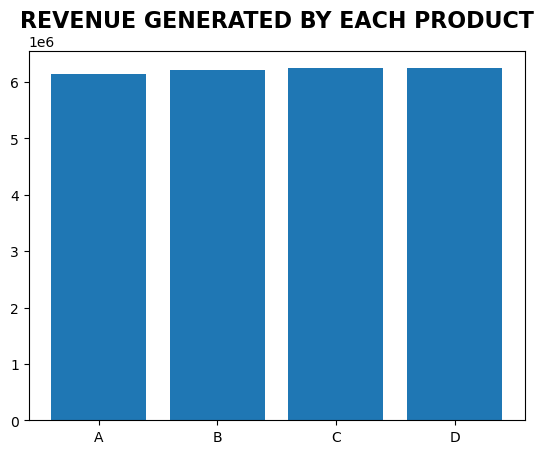

In [30]:
plt.bar(products,TA)
plt.title('REVENUE GENERATED BY EACH PRODUCT',fontsize=16,fontweight='bold')
plt.show()

In [31]:
paymt=Retail.groupby('PaymentMethod')['TotalAmount'].sum()

In [32]:
p=paymt.index
pym=paymt.values

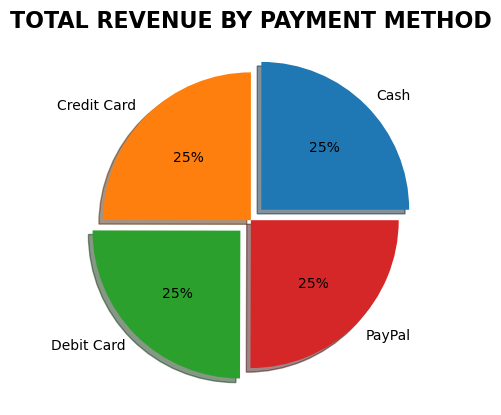

In [33]:
plt.pie(pym,labels=p,autopct="%1.0f%%",shadow=True,explode=[0.1,0,0.1,0])
plt.title('TOTAL REVENUE BY PAYMENT METHOD',fontsize=16,fontweight='bold')
plt.show()

In [34]:
paymt

PaymentMethod
Cash           6207162.0
Credit Card    6203588.0
Debit Card     6203059.0
PayPal         6219735.0
Name: TotalAmount, dtype: float64

In [35]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
 10  Day_Name            100000 non-null  object        
 11  Month_Name          100000 non-null  object        
 12  Quater              100000 non-null  int32         
 13  Year                100000 non

C:\Users\USER\AppData\Local\Temp\ipykernel_9888\3550666668.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


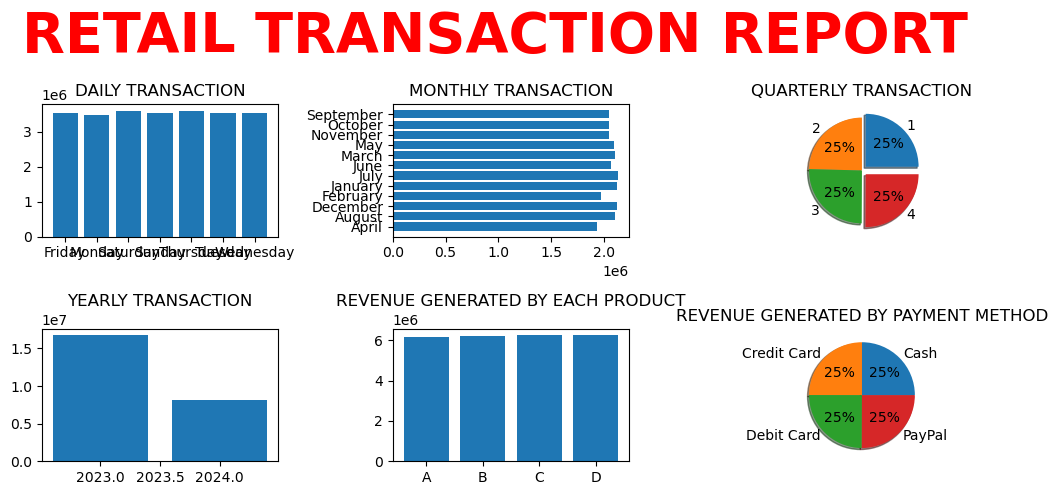

In [38]:
fig,CR=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
fig.suptitle('RETAIL TRANSACTION REPORT',fontsize=40,fontweight='bold',c='r')
plt.tight_layout()
CR[0,0].set(title='DAILY TRANSACTION')
CR[0,0].bar(Daily,Total)
CR[0,1].set(title='MONTHLY TRANSACTION')
CR[0,1].barh(monthly,mtotal)
CR[0,2].set(title='QUARTERLY TRANSACTION')
CR[0,2].pie(qtotal,labels=quat,autopct="%1.0f%%",shadow=True,explode=[0.1,0,0,0.1])
CR[1,0].set(title='YEARLY TRANSACTION')
CR[1,0].bar(yr,Ytotal)
CR[1,1].set(title='REVENUE GENERATED BY EACH PRODUCT')
CR[1,1].bar(products,TA)
CR[1,2].set(title='REVENUE GENERATED BY PAYMENT METHOD')
CR[1,2].pie(pym,labels=p,autopct="%1.0f%%",shadow=True)
plt.tight_layout()
plt.savefig('Retail Report')
plt.show()